In [166]:
import pylab as plt
import numpy as np
from matplotlib import gridspec
import math
 
def rec_plot(s, eps=None, steps=None):
    if eps==None: eps=0.01
    if steps==None: steps=10
    N = s.size
    S = np.repeat(s[None,:], N, axis=0)
    Z = np.floor(np.abs(S-S.T)/eps)
    Z[Z>steps] = steps
 
    return Z[::-1,:]

def rec_plot_pb(s, eps=None):
    if eps==None: eps=0.1
    N = s.size
    S = np.repeat(s[None,:], N, axis=0)
    Z = np.abs(S-S.T) > eps
     
    return Z[::-1,:]

def plot_graph(s, f=rec_plot, eps=None):
    fig = plt.figure(figsize=(4, 6)) 
    gs = gridspec.GridSpec(2, 1, height_ratios=[1, 4]) 
    ax1 = plt.subplot(gs[0])
    ax2 = plt.subplot(gs[1])
    ax1.plot(s)
    ax2.imshow(f(s, eps=eps), cmap='gray')
    plt.show()
    
def brownian_path(N):
    Δt_sqrt = math.sqrt(1 / N)
    Z = np.random.randn(N)
    Z[0] = 0
    B = np.cumsum(Δt_sqrt * Z)
    return B

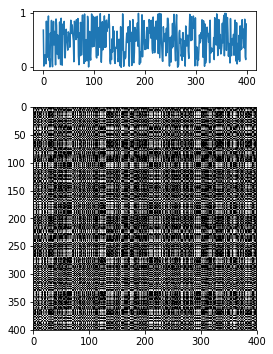

In [167]:
%matplotlib inline

uniform = np.random.random(400)
plot_graph(uniform, rec_plot, eps=0.2)

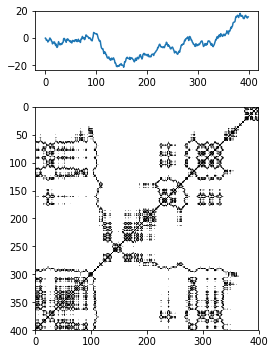

In [170]:
brownian = np.cumsum(np.random.normal(0,1,400))
plot_graph(brownian, rec_plot, eps=0.2)

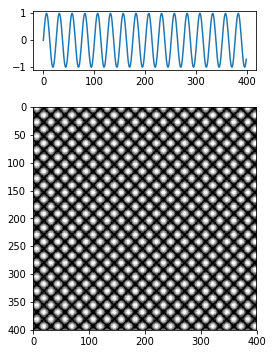

In [177]:
sin = np.sin(np.arange(0,100,0.25))
plot_graph(sin, rec_plot, eps=0.2)

In [211]:
def log_map(x0=0.49, r=4, c=0.01, serie=[], n=1, i=0):
    if n == 0:
        return serie
    else:
        return log_map(r * x0 * (1 - x0) + (c * i), r, c, serie + [x0], n-1, i+1)

C:\Users\aroni\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in subtract
  # This is added back by InteractiveShellApp.init_path()
C:\Users\aroni\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: RuntimeWarning: invalid value encountered in greater
  if sys.path[0] == '':


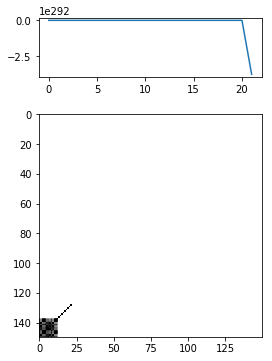

In [212]:
logistic = np.array(log_map(0.499, r=4, n=150))
plot_graph(logistic, rec_plot, eps=0.2)

In [210]:
np.array(log_map(0.49999, r=4, n=150))

array([ 4.99990000e-001,  1.01000000e+000, -3.03999984e-002,
       -1.15296633e-001, -5.04359787e-001, -3.02495432e+000,
       -4.86912120e+001, -9.67809134e+003, -3.74700520e+008,
       -5.61601920e+017, -1.26158687e+036, -6.36640570e+072,
       -1.62124486e+146, -1.05137396e+293,             -inf,
                   -inf,             -inf,             -inf,
                   -inf,             -inf,             -inf,
                   -inf,             -inf,             -inf,
                   -inf,             -inf,             -inf,
                   -inf,             -inf,             -inf,
                   -inf,             -inf,             -inf,
                   -inf,             -inf,             -inf,
                   -inf,             -inf,             -inf,
                   -inf,             -inf,             -inf,
                   -inf,             -inf,             -inf,
                   -inf,             -inf,             -inf,
                   -inf,